# Drzewa Decyzyjne

In [1]:
# Imports
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from ydata_profiling import ProfileReport
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
import pandas as pd
import numpy as np

## Import zbioru Secondary Mushroom

In [2]:
mushroom_species_info_df = pd.read_csv("../dbs/MushroomDataset/primary_data.csv", sep=";")
mushroom_species_info_df.head()

,family,name,class,cap-diameter,cap-shape,Cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,Spore-print-color,habitat,season
0,Amanita Family,Fly Agaric,p,"[10, 20]","[x, f]","[g, h]","[e, o]",[f],[e],NaN,...,[s],[y],[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a, w]"
1,Amanita Family,Panther Cap,p,"[5, 10]","[p, x]",[g],[n],[f],[e],NaN,...,NaN,[y],[w],[u],[w],[t],[p],NaN,[d],"[u, a]"
2,Amanita Family,False Panther Cap,p,"[10, 15]","[x, f]",NaN,"[g, n]",[f],[e],NaN,...,NaN,NaN,[w],[u],[w],[t],"[e, g]",NaN,[d],"[u, a]"
3,Amanita Family,The Blusher,e,"[5, 15]","[x, f]",NaN,[n],[t],NaN,NaN,...,[b],NaN,[w],[u],[w],[t],[g],NaN,[d],"[u, a]"
4,Amanita Family,Death Cap,p,"[5, 12]","[x, f]",[h],[r],[f],NaN,[c],...,NaN,NaN,[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a]"


In [3]:
raw_df = pd.read_csv("../dbs/MushroomDataset/secondary_data.csv", sep=";")
raw_df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [4]:
# Podział danych na zbiór treningowy i testowy
X = raw_df.drop(columns=["class"])
y = raw_df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Połączenie X_train i y_train w jedną ramkę danych do analizy
df = X_train.copy()
df["class"] = y_train

## Informacje o zbiorze danych ze strony

### Classification
- **Edibility**: Binary class divided into edible (`e`) and poisonous (`p`). Poisonous category also includes mushrooms of unknown edibility.

### Features
1. **Cap Diameter** (Metric)
   - Type: Float number (cm)

2. **Cap Shape** (Nominal)
   - Options: Bell (`b`), Conical (`c`), Convex (`x`), Flat (`f`), Sunken (`s`), Spherical (`p`), Others (`o`)

3. **Cap Surface** (Nominal)
   - Options: Fibrous (`i`), Grooves (`g`), Scaly (`y`), Smooth (`s`), Shiny (`h`), Leathery (`l`), Silky (`k`), Sticky (`t`), Wrinkled (`w`), Fleshy (`e`)

4. **Cap Color** (Nominal)
   - Options: Brown (`n`), Buff (`b`), Gray (`g`), Green (`r`), Pink (`p`), Purple (`u`), Red (`e`), White (`w`), Yellow (`y`), Blue (`l`), Orange (`o`), Black (`k`)

5. **Does Bruise/Bleed** (Nominal)
   - Options: Bruises or Bleeding (`t`), No (`f`)

6. **Gill Attachment** (Nominal)
   - Options: Adnate (`a`), Adnexed (`x`), Decurrent (`d`), Free (`e`), Sinuate (`s`), Pores (`p`), None (`f`), Unknown (`?`)

7. **Gill Spacing** (Nominal)
   - Options: Close (`c`), Distant (`d`), None (`f`)

8. **Gill Color** (Nominal)
   - Options: See Cap Color + None (`f`)

9. **Stem Height** (Metric)
   - Type: Float number (cm)

10. **Stem Width** (Metric)
    - Type: Float number (mm)

11. **Stem Root** (Nominal)
    - Options: Bulbous (`b`), Swollen (`s`), Club (`c`), Cup (`u`), Equal (`e`), Rhizomorphs (`z`), Rooted (`r`)

12. **Stem Surface** (Nominal)
    - Options: See Cap Surface + None (`f`)

13. **Stem Color** (Nominal)
    - Options: See Cap Color + None (`f`)

14. **Veil Type** (Nominal)
    - Options: Partial (`p`), Universal (`u`)

15. **Veil Color** (Nominal)
    - Options: See Cap Color + None (`f`)

16. **Has Ring** (Nominal)
    - Options: Ring (`t`), None (`f`)

17. **Ring Type** (Nominal)
    - Options: Cobwebby (`c`), Evanescent (`e`), Flaring (`r`), Grooved (`g`), Large (`l`), Pendant (`p`), Sheathing (`s`), Zone (`z`), Scaly (`y`), Movable (`m`), None (`f`), Unknown (`?`)

18. **Spore Print Color** (Nominal)
    - Options: See Cap Color

19. **Habitat** (Nominal)
    - Options: Grasses (`g`), Leaves (`l`), Meadows (`m`), Paths (`p`), Heaths (`h`), Urban (`u`), Waste (`w`), Woods (`d`)

20. **Season** (Nominal)
    - Options: Spring (`s`), Summer (`u`), Autumn (`a`), Winter (`w`)


## EDA
Wykorzytane AutoEDA z `ydata-profiling`.

In [5]:
# AutoEDA
profile = ProfileReport(df, title="Secondary Mushroom Data Report", explorative=True)
profile.to_file("mushroom_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/miniconda3/envs/py310/lib/python3.10/site-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'y'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

/opt/miniconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/miniconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/miniconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldc

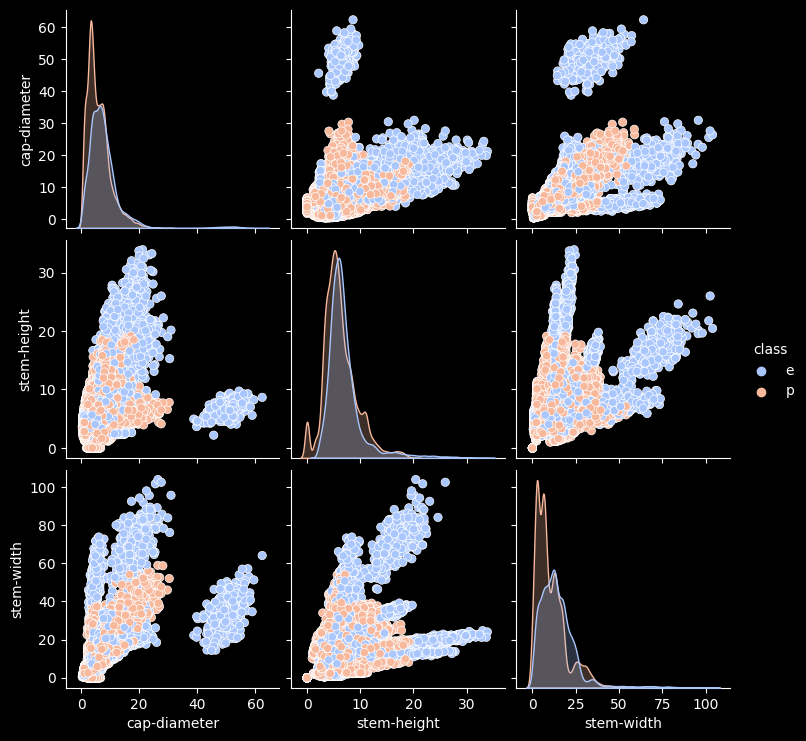

In [6]:
sns.pairplot(df, hue='class', palette='coolwarm')
plt.show()

In [7]:
# profile.to_widgets()

In [8]:
# Sprawdzenie wartości ujemnych
df_numeric = df.select_dtypes(include=[np.number])
negative_values_count = df_numeric.lt(0).sum().sort_values(ascending=False)
negative_values_count

cap-diameter    0
stem-height     0
stem-width      0
dtype: int64

## Wnioski EDA:

### Brakujące wartości:
Powyżej 50%:
- `veil-type`: 94.8% brakujących wartości, reszta oznaczona jako `u` - zamiana kolumny na binarną.
- `spore-print-color`: 89.6% brakujących wartości, reszta: 7 kategorii - wpisanie `none` jako brakująca wartość.
- `veil-color`: 87.9% brakujących wartości, reszta: 5 kategorii - wpisanie `f` jako brakująca wartość (tak jak w opisie wyżej).
- `stem-root`: 84.4% brakujących wartości, reszta: 5 kategorii - wpisanie `none` jako brakująca wartość.
- `stem-surface`: 62.4% brakujących wartości, reszta: 7 kategorii - wpisanie `f` jako brakująca wartość (tak jak w opisie wyżej).

Poniżej 50%:
- `gill-spacing`: 41% brakuje, reszta: 7 kategorii - wpisanie `f` jako brakująca wartość.
- `cap-surface`: 23.1% brakuje, reszta: 11 kategorii - wpisanie `unknown` jako brakująca wartość.
- `gill-attachment`: 16.2% brakuje, reszta: 7 kategorii - wpisanie `none` jako brakująca wartość.
- `ring-type`: 4% brakuje, reszta 8 kategorii - wpisanie `unknown` jako brakująca wartość

Numeryczne: 
- `stem-width`: 1.7% wartości zerowych - usunięcie brakujących wierszy
- `stem-height`: 1.7% wartości zerowych - usunięcie brakujących wierszy

### Odstające wartości:



## Przygotowanie danych do modelowania


In [9]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [10]:
class FillMissing(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.fill_values = {
            'veil-type':         ('binary',   None),
            'spore-print-color': ('constant', 'none'),
            'stem-root':         ('constant', 'none'),
            'veil-color':        ('constant', 'f'),
            'stem-surface':      ('constant', 'f'),
            'gill-spacing':      ('constant', 'f'),
            'cap-surface':       ('constant', 'unknown'),
            'gill-attachment':   ('constant', 'none'),
            'ring-type':         ('constant', 'unknown')
        }

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        
        for col, (strategy, fill_value) in self.fill_values.items():
            if strategy == 'binary':
                X_copy[col] = np.where(X_copy[col].isnull(), 0, 1)
            elif strategy == 'constant':
                X_copy[col] = X_copy[col].fillna(fill_value)
        
        return X_copy

In [11]:
numeric_features = df.select_dtypes(include=[np.number]).columns
categorical_features = [col for col in X.columns if col not in numeric_features]

numeric_features, categorical_features

(Index(['cap-diameter', 'stem-height', 'stem-width'], dtype='object'),
 ['cap-shape',
  'cap-surface',
  'cap-color',
  'does-bruise-or-bleed',
  'gill-attachment',
  'gill-spacing',
  'gill-color',
  'stem-root',
  'stem-surface',
  'stem-color',
  'veil-type',
  'veil-color',
  'has-ring',
  'ring-type',
  'spore-print-color',
  'habitat',
  'season'])

In [12]:
preprocessor = ColumnTransformer(transformers=[
    ('numerical', StandardScaler(), numeric_features),
    ('categorical', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
])

## Wytrenowanie drzew decyzyjnych


In [100]:
pipeline = Pipeline(steps=[
    ('fill_missing', FillMissing()),
    ('preprocessor', preprocessor),
    ('clf', DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=10, min_samples_split=5, min_samples_leaf=2))
])

pipeline.fit(X_train, y_train)

test_accuracy = pipeline.score(X_test, y_test)
print("Test accuracy: {:.2f}".format(test_accuracy))

Test accuracy: 0.86


### Przeszukiwanie hiperparametrów - sprawdzenie wyników metryk

In [14]:
pipeline = Pipeline(steps=[
    ('fill_missing', FillMissing()),
    ('preprocessor', preprocessor),
    ('clf', DecisionTreeClassifier(random_state=42))
])

In [101]:
param_grid = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [None, 5, 10, 15, 20],
    'clf__min_samples_leaf': [1, 2, 5, 10, 25],
    'clf__ccp_alpha': [0.0, 0.01, 0.05, 0.1, 0.2]
}
scoring_metrics = ['accuracy', 'f1', 'neg_log_loss', 'roc_auc']
results_dict = {
    'metric': [], 
    'best_params': [], 
    'best_score': [], 
    'test_score': [],
    'tree_depth': [],
    'num_leaves': [],
    'num_nodes': [],
}

In [102]:
for metric in scoring_metrics:
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring=metric,
        cv=5,
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    test_score = grid_search.score(X_test, y_test)

    results_dict['metric'].append(metric)
    results_dict['best_params'].append(best_params)
    results_dict['best_score'].append(best_score)
    results_dict['test_score'].append(test_score)
    results_dict['tree_depth'].append(grid_search.best_estimator_['clf'].get_depth())
    results_dict['num_leaves'].append(grid_search.best_estimator_['clf'].get_n_leaves())
    results_dict['num_nodes'].append(grid_search.best_estimator_['clf'].tree_.node_count)

    print(f"Najlepsze parametry dla metryki {metric}: ", best_params)
    print(f"Najlepsza średnia dokładność dla {metric}: {best_score:.2f}")
    print(f"Test score dla {metric}: {test_score:.2f}")

Najlepsze parametry dla metryki accuracy:  {'clf__ccp_alpha': 0.0, 'clf__criterion': 'gini', 'clf__max_depth': None, 'clf__min_samples_leaf': 1}
Najlepsza średnia dokładność dla accuracy: 1.00
Test score dla accuracy: 1.00
Najlepsze parametry dla metryki f1:  {'clf__ccp_alpha': 0.0, 'clf__criterion': 'gini', 'clf__max_depth': None, 'clf__min_samples_leaf': 1}
Najlepsza średnia dokładność dla f1: 1.00
Test score dla f1: 1.00
Najlepsze parametry dla metryki neg_log_loss:  {'clf__ccp_alpha': 0.0, 'clf__criterion': 'gini', 'clf__max_depth': None, 'clf__min_samples_leaf': 1}
Najlepsza średnia dokładność dla neg_log_loss: -0.03
Test score dla neg_log_loss: -0.02
Najlepsze parametry dla metryki roc_auc:  {'clf__ccp_alpha': 0.0, 'clf__criterion': 'gini', 'clf__max_depth': None, 'clf__min_samples_leaf': 1}
Najlepsza średnia dokładność dla roc_auc: 1.00
Test score dla roc_auc: 1.00


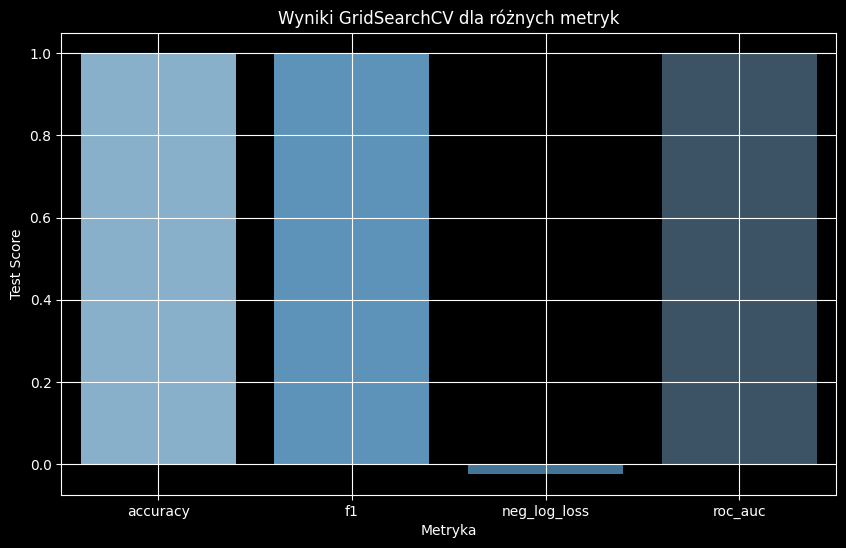

In [29]:
results_df = pd.DataFrame(results_dict)

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    data=results_df,
    x='metric',
    y='test_score',
    palette='Blues_d',
    ax=ax
)
ax.set_title("Wyniki GridSearchCV dla różnych metryk")
ax.set_ylabel("Test Score")
ax.set_xlabel("Metryka")
plt.grid(visible=True)
plt.show()

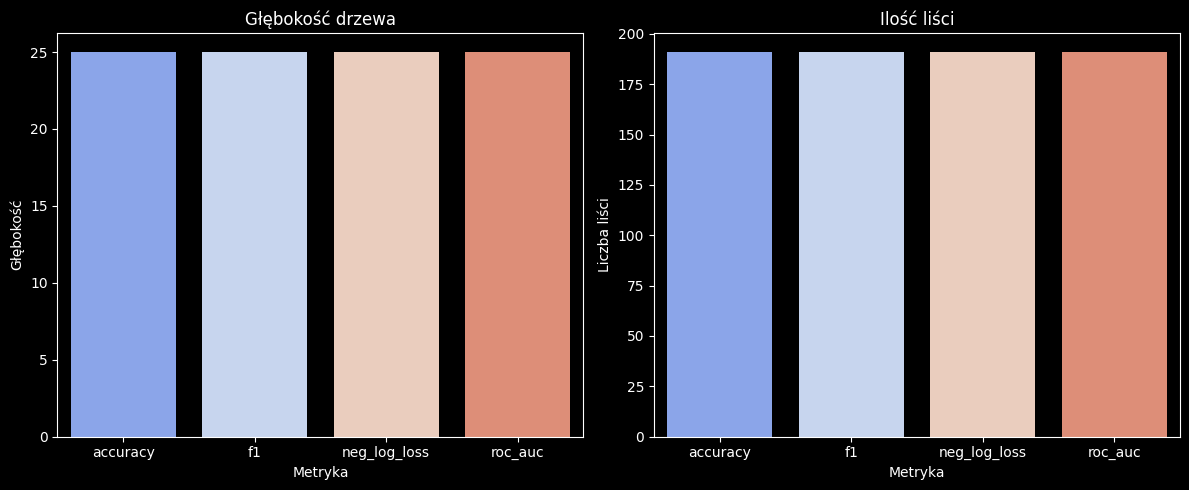

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(
    x='metric',
    y='tree_depth',
    data=results_df,
    ax=ax[0],
    palette='coolwarm'
)
ax[0].set_title("Głębokość drzewa")
ax[0].set_ylabel("Głębokość")
ax[0].set_xlabel("Metryka")

sns.barplot(
    x='metric',
    y='num_leaves',
    data=results_df,
    ax=ax[1],
    palette='coolwarm'
)
ax[1].set_title("Ilość liści")
ax[1].set_ylabel("Liczba liści")
ax[1].set_xlabel("Metryka")

plt.tight_layout()
plt.show()

### Wizualizacja przykładowych drzew decyzyjnych

In [ ]:
def get_feature_names(preprocessor):
    numeric_features = preprocessor.transformers_[0][2]
    numeric_names = list(numeric_features)

    categorical_transformer = preprocessor.named_transformers_['categorical']
    categorical_names = list(categorical_transformer.get_feature_names_out())

    return numeric_names + categorical_names

In [97]:
sample_params = [
    {'criterion': 'gini',       'max_depth': None,  'min_samples_leaf': 1,  'ccp_alpha': 0.0},
    {'criterion': 'gini',       'max_depth': 5,     'min_samples_leaf': 2,  'ccp_alpha': 0.01},
    {'criterion': 'entropy',    'max_depth': 10,    'min_samples_leaf': 1,  'ccp_alpha': 0.005},
    {'criterion': 'gini',       'max_depth': None,  'min_samples_leaf': 5,  'ccp_alpha': 0.0},
    {'criterion': 'entropy',    'max_depth': 20,    'min_samples_leaf': 1,  'ccp_alpha': 0.007},
    {'criterion': 'entropy',    'max_depth': 15,    'min_samples_leaf': 2,  'ccp_alpha': 0.007},
    {'criterion': 'gini',       'max_depth': 5,     'min_samples_leaf': 5,  'ccp_alpha': 0.0},
    {'criterion': 'entropy',    'max_depth': 10,    'min_samples_leaf': 2,  'ccp_alpha': 0.0},
]

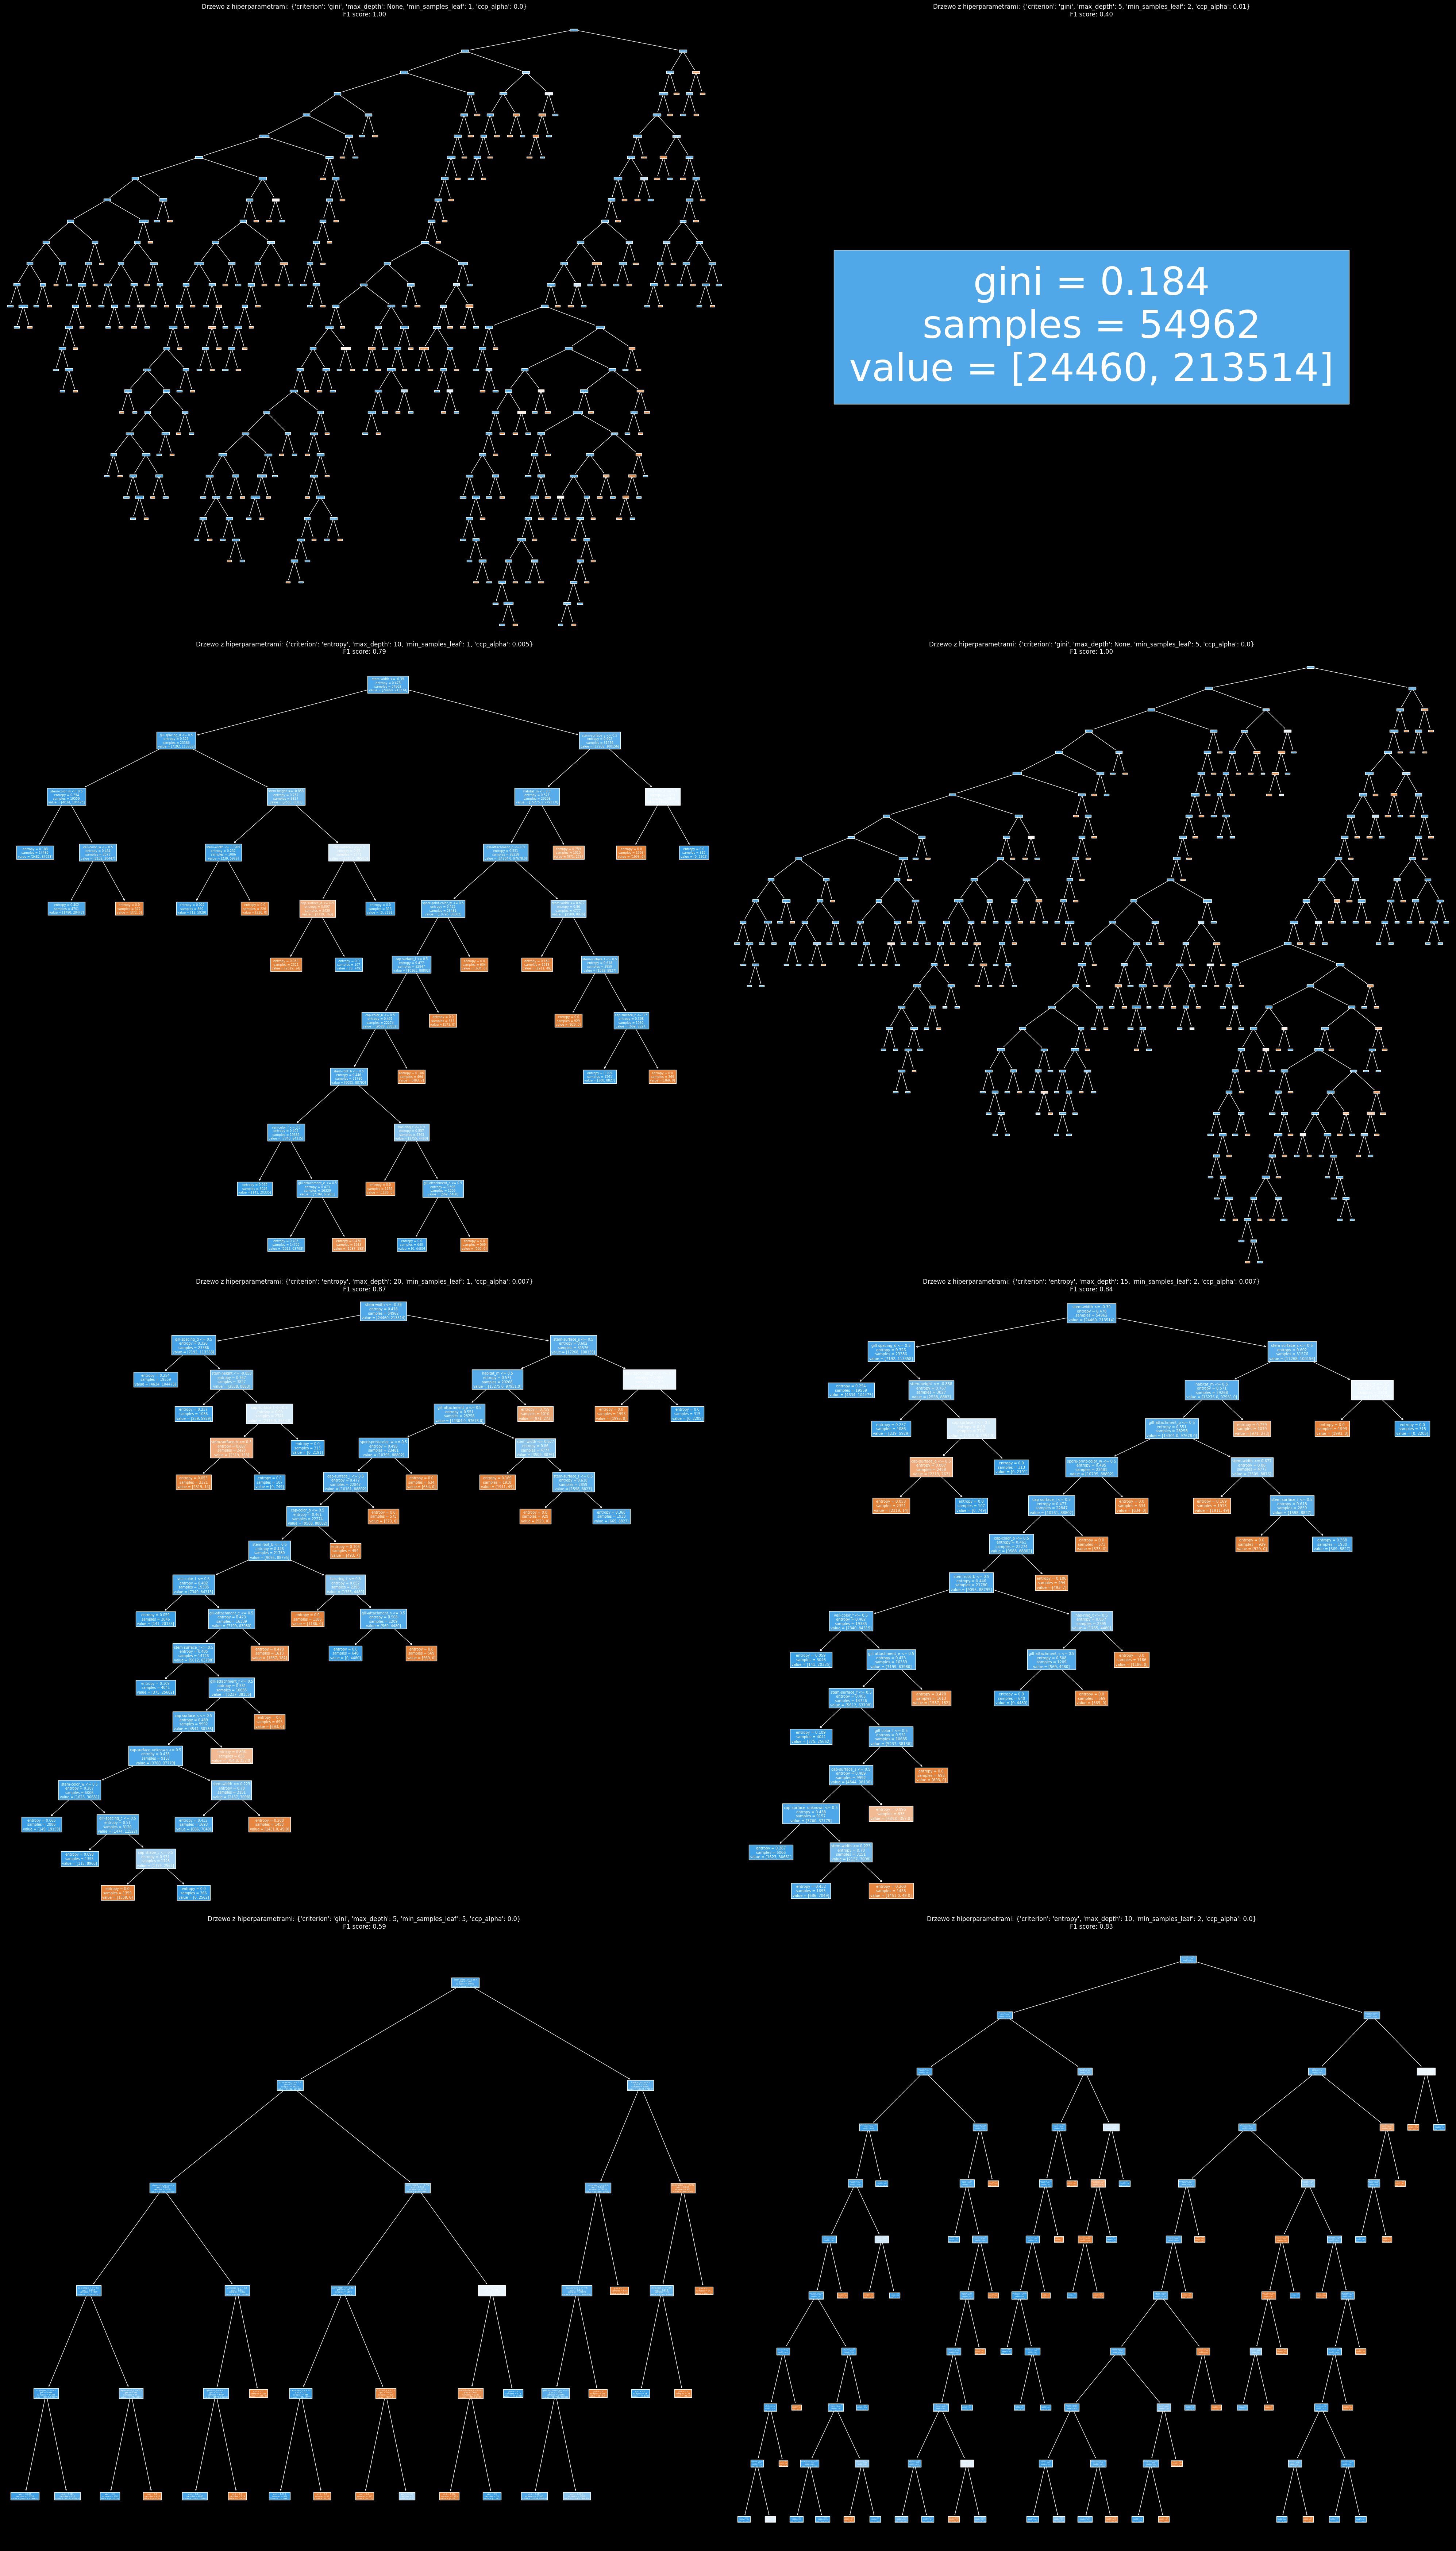

In [98]:
fig, axs = plt.subplots(4, 2, figsize=(40, 70))
axs = axs.flatten()

all_feature_names = get_feature_names(preprocessor)

for i, params in enumerate(sample_params):

    pipeline.set_params(
        clf__criterion=params['criterion'], 
        clf__max_depth=params['max_depth'],
        clf__min_samples_leaf=params['min_samples_leaf'], 
        clf__ccp_alpha=params['ccp_alpha']
    )
    
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')    

    clf = pipeline.named_steps['clf']
    plot_tree(clf, filled=True, feature_names=all_feature_names, ax=axs[i])
    axs[i].set_title(f"Drzewo z hiperparametrami: {params}\nF1 score: {f1:.2f}")

plt.tight_layout()
plt.show()

### Badanie parametru wagi klasy

In [76]:
param_grid = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [None, 5, 15, 20],
    'clf__min_samples_leaf': [1, 2, 5],
    'clf__ccp_alpha': [0.0, 0.01, 0.05],
    'clf__class_weight': ['balanced', None, {0: 1, 1: 2}, {0: 1, 1: 3}]
}
scoring_metrics = ['f1', 'precision', 'recall']

for metric in scoring_metrics:
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring=metric,
        cv=5,
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    test_score = grid_search.score(X_test, y_test)

    results_dict['metric'].append(metric)
    results_dict['best_params'].append(best_params)
    results_dict['best_score'].append(best_score)
    results_dict['test_score'].append(test_score)
    results_dict['tree_depth'].append(grid_search.best_estimator_['clf'].get_depth())
    results_dict['num_leaves'].append(grid_search.best_estimator_['clf'].get_n_leaves())
    results_dict['num_nodes'].append(grid_search.best_estimator_['clf'].tree_.node_count)

    print(f"Najlepsze parametry dla metryki {metric}: ", best_params)
    print(f"Najlepsza średnia dokładność dla {metric}: {best_score:.2f}")
    print(f"Test score dla {metric}: {test_score:.2f}")

Najlepsze parametry dla metryki f1:  {'clf__ccp_alpha': 0.0, 'clf__class_weight': 'balanced', 'clf__criterion': 'gini', 'clf__max_depth': None, 'clf__min_samples_leaf': 1}
Najlepsza średnia dokładność dla f1: 1.00
Test score dla f1: 1.00


/opt/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/py31

Najlepsze parametry dla metryki precision:  {'clf__ccp_alpha': 0.0, 'clf__class_weight': None, 'clf__criterion': 'gini', 'clf__max_depth': None, 'clf__min_samples_leaf': 1}
Najlepsza średnia dokładność dla precision: 1.00
Test score dla precision: 1.00
Najlepsze parametry dla metryki recall:  {'clf__ccp_alpha': 0.01, 'clf__class_weight': {0: 1, 1: 3}, 'clf__criterion': 'gini', 'clf__max_depth': None, 'clf__min_samples_leaf': 1}
Najlepsza średnia dokładność dla recall: 1.00
Test score dla recall: 1.00


In [77]:
def evaluate_param_impact(param_grid, base_params):
    results = []
    for param, values in param_grid.items():
        for value in values:
            params = base_params.copy()
            params[param] = value

            # Zastosowanie parametrów do pipeline'u
            pipeline.set_params(**params)
            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)
            f1 = f1_score(y_test, y_pred, average='weighted')
            precision = precision_score(y_test, y_pred, average='weighted')
            recall = recall_score(y_test, y_pred, average='weighted')

            # Pobranie głębokości drzewa i liczby liści
            clf = pipeline.named_steps['clf']
            depth = clf.get_depth()
            num_leaves = clf.get_n_leaves()

            results.append({
                'param_name': param,
                'param_value': str(value),
                'f1_score': f1,
                'precision': precision,
                'recall': recall,
                'tree_depth': depth,
                'num_leaves': num_leaves
            })

    return pd.DataFrame(results).reset_index(drop=True)

### Badanie wpływu parametrów na wyniki względem domyślnych wartości

In [90]:

base_params = {
    'clf__criterion': 'gini',
    'clf__max_depth': None,
    'clf__min_samples_leaf': 1,
    'clf__ccp_alpha': 0.0,
    'clf__class_weight': None
}

param_grid = {
    'clf__criterion': ['gini', 'entropy', 'log_loss'],
    'clf__max_depth': [None, 5, 10, 15, 20, 25],
    'clf__min_samples_leaf': [1, 2, 5, 10],
    'clf__ccp_alpha': [0.0, 0.01, 0.02, 0.05, 0.1],
    'clf__class_weight': ['balanced', None, {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}, {0: 1, 1: 6}, {0: 1, 1: 7}]
}

results_df = evaluate_param_impact(param_grid, base_params)

/opt/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


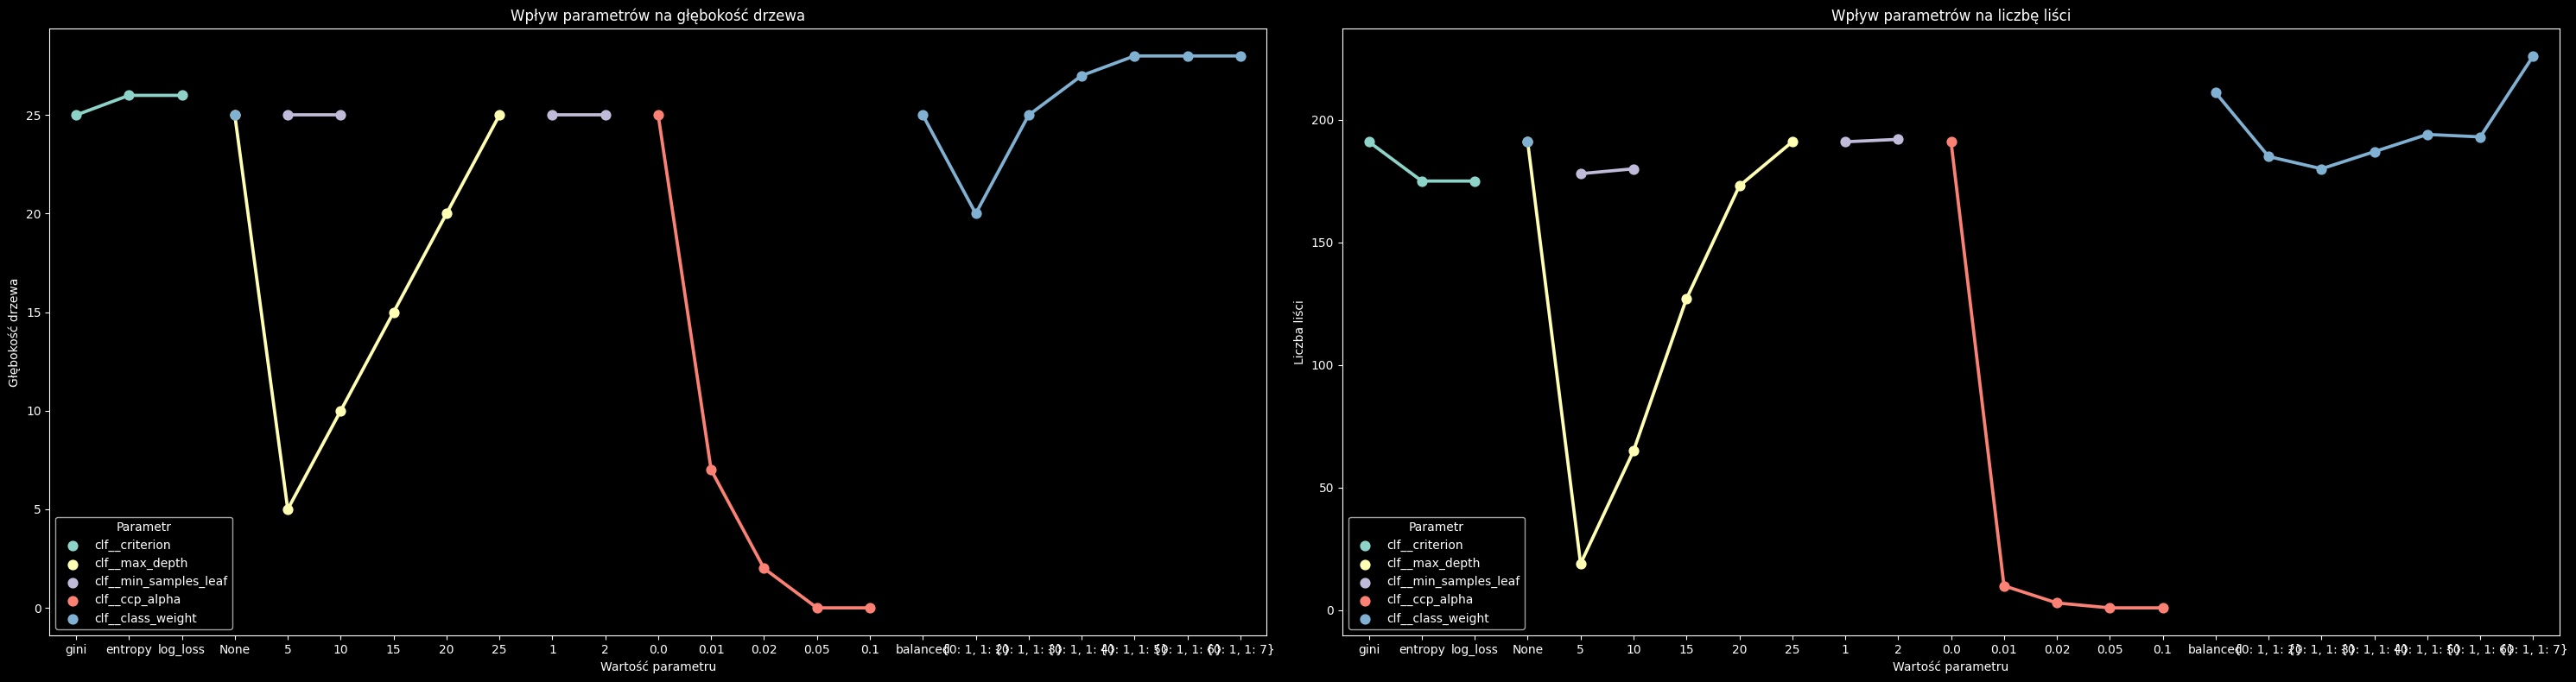

In [95]:
fig, axs = plt.subplots(1, 2, figsize=(30, 8))

sns.pointplot(data=results_df, x='param_value', y='tree_depth', hue='param_name', ax=axs[0])
axs[0].set_title("Wpływ parametrów na głębokość drzewa")
axs[0].set_xlabel("Wartość parametru")
axs[0].set_ylabel("Głębokość drzewa")
axs[0].legend(title="Parametr")

sns.pointplot(data=results_df, x='param_value', y='num_leaves', hue='param_name', ax=axs[1])
axs[1].set_title("Wpływ parametrów na liczbę liści")
axs[1].set_xlabel("Wartość parametru")
axs[1].set_ylabel("Liczba liści")
axs[1].legend(title="Parametr")

plt.tight_layout()
plt.show()

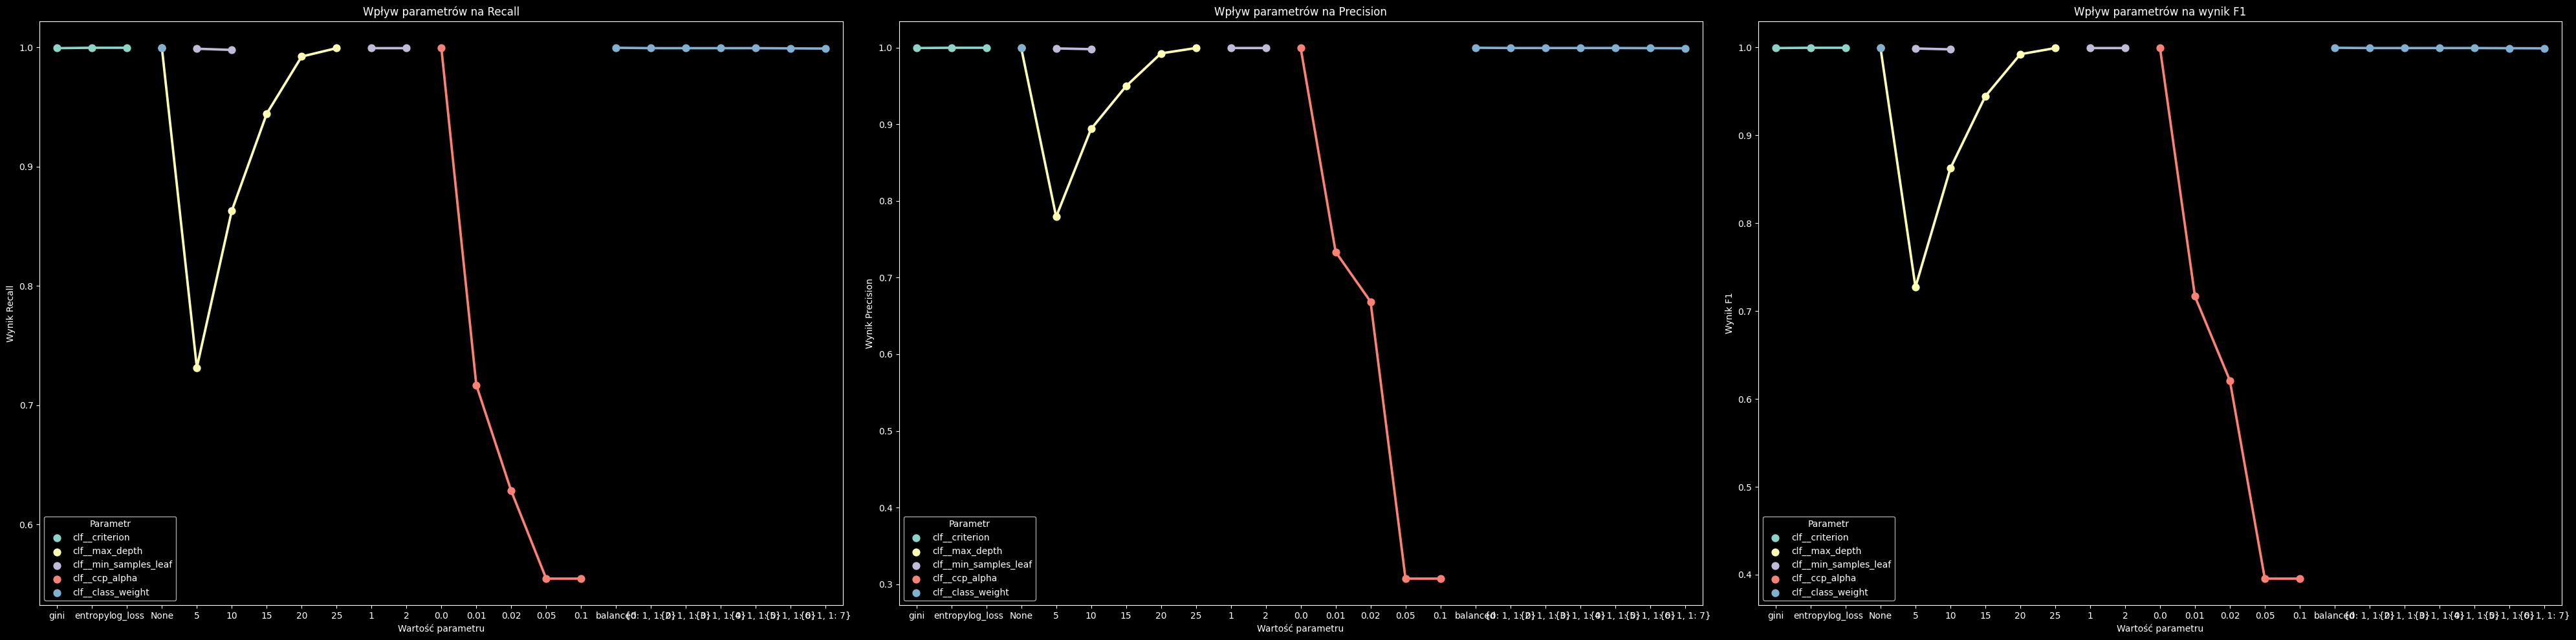

In [96]:
fig, axs = plt.subplots(1, 3, figsize=(40, 10))

sns.pointplot(data=results_df, x='param_value', y='recall', hue='param_name', ax=axs[0])
axs[0].set_title("Wpływ parametrów na Recall")
axs[0].set_xlabel("Wartość parametru")
axs[0].set_ylabel("Wynik Recall")
axs[0].legend(title="Parametr")

sns.pointplot(data=results_df, x='param_value', y='precision', hue='param_name', ax=axs[1])
axs[1].set_title("Wpływ parametrów na Precision")
axs[1].set_xlabel("Wartość parametru")
axs[1].set_ylabel("Wynik Precision")
axs[1].legend(title="Parametr")

sns.pointplot(data=results_df, x='param_value', y='f1_score', hue='param_name', ax=axs[2])
axs[2].set_title("Wpływ parametrów na wynik F1")
axs[2].set_xlabel("Wartość parametru")
axs[2].set_ylabel("Wynik F1")
axs[2].legend(title="Parametr")

plt.tight_layout()
plt.show()